# Project 2 - Ames Housing Data and Kaggle Challenge

## Problem Statement

In real estate industry, housing prices are of great interest for both buyers and sellers. As a leader in real estate consulting, RF Real Estate Consulting Firm offer services related to housing market research and valuation for houseowners and buyers. The valuation of house price is based on house features; however, so far in the property market in Iowa, there is a lack of trustworthy and professional price prediction model out there. 

Hence, the goal of this project is to create a regression model that is able to accurately predict the house sales price given the house features. 

To develop the most accurate model, I will be evaluating 3 models: 1. `LinearRegression`, 2. `LassoCV` and 3. `RidgeCV`. Performance metrics will be used to compare which model is the most appropriate in this case and the two performance metrics are: 

1. R-squared (R2) : R2 score measures the proportion of variation in the dependent variable (house prices) that can be attributed to the independent variable (house features). A higher R2 score indicates a better fit for the model. In this project, we will evaluate which model has the highest R2 score, out of 1. 

2. Root-mean-square error (RMSE) : RMSE measures the difference between predicted values and the actual values. The RMSE of the train and test datasets should be very similar if a good model is built. Hence, here we are looking for the model that can minimize RMSE.

With the above information, our company will be able to generate more accurate house price prediction given those highly correlated housefeatures. Eventually, it benefits all the stakeholders, including our direct users - real estate consultants, and indirect users - sellers and buyers. Our real estate consultants can make use of the predicted house prices to better our advise clients accurately with credibility and enhance our company reputation. 

##  Executive Summary

RF Real Estate Consulting company has been offering real estate consulting services in purchasing adn selling houses in Iowa. The most asked question among all stakeholders, include consulting professionals, buyers and sellers is ' how much?'. The house price is the most important indicator that affects the decision making. 

We have worked closely with developers, investors and institutions such as banks and governments to be the bedrock for all their real estate needs. Developing a model to predict housing sales price will allow us to have a more in-depth understanding of local housing market in Ames, so that our clients are able to reduce costs, create value and improve the investment performance.

Due to the pandemic situation since the beginning of the year, there are more uncertainties in the property market in Iowa. Our company is looking for a reliable model that can help predict the house prices more accurately, so that we are able to better advise our clients if they are selling or buying at the ideal price. Only if we can maintain our consulting services professional and trustworthy, we will be able to build the trust with our clients and generate more revenue for our company. 

Our company will count on this house prediction model to achieve three main objectives:

1. Enhance company reputation: 

    The house price prediction model could be a huge boost to our clients's confidence. There is always a fierce competition among the real estate consulting services in Iowa. In order to stand out, it is essential to provide more professional and more credible service that our competitors can't. Hence, we will also make use of this model as one of our selling point in the marketing campaigns to strenthen our branding, so as to attract more new clients and retain the existing clients. 
    
    
2. Build trust with clients and develop long term customer relationship:

    Apart from marketing strategy, we will also enhance the customer relationship management making use of this model. Since this model is exclusively created and used by our company, we believe it will enable us to build trust with clients and develop long term customer relationship. In long term, our company will be able to build a client base that stablizes company's source of business and revenue. 


3. Generate more revenue: 

    The ultimate goal of developing the model and adjusting marketing and operation strategies is to generate more revenue for the company.  


Our company looks forward to making use of the model to align our strategy with business goals and help our business to be more successful. 

### Contents:
1. [Data Import](#Data-Import)
2. [Data Dictionary](#Data-Dictionary)
3. [Data Exploration](#Data-Exploration)
4. [Data Cleaning for Train Set](#Data-Cleaning-for-Train-Set)
5. [Data Cleaning for Test Set](#Data-Cleaning-for-Test-Set)
6. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
7. [Preprocessing and Modeling](#Preprocessing-and-Modeling)
8. [Predict Test Dataset](#Predict-Test-Dataset)

In [1]:
# imports:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold

from sklearn.metrics import mean_squared_error
from math import sqrt

%matplotlib inline

<a id='demo'></a>

## Data Import

In [2]:
# read in test & train csv
train = pd.read_csv ('datasets/train.csv')
test = pd.read_csv ('datasets/test.csv')


# replace spaces in column names and convert all columns to lowercase:
train.columns = [x.lower().replace(' ','_') for x in train.columns]
test.columns = [x.lower().replace(' ','_') for x in test.columns]

In [3]:
# display data

train.head(10)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500
5,138,535126040,20,RL,137.0,16492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,6,2010,WD,190000
6,2827,908186070,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,6,2006,New,140000
7,145,535154050,20,RL,NaN,12160,Pave,NaN,IR1,Lvl,...,0,0,NaN,MnPrv,NaN,0,5,2010,COD,142000
8,1942,535353130,20,RL,NaN,15783,Pave,NaN,Reg,Lvl,...,0,0,NaN,MnPrv,Shed,400,6,2007,WD,112500
9,1956,535426130,60,RL,70.0,11606,Pave,NaN,IR1,HLS,...,0,0,NaN,NaN,NaN,0,9,2007,WD,135000


In [4]:
# display data

test.head(10)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD
5,333,923228370,160,RM,21.0,1890,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,6,2010,WD
6,1327,902427150,20,RM,52.0,8516,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,5,2008,WD
7,858,907202130,20,RL,NaN,9286,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,10,2009,WD
8,95,533208090,160,FV,39.0,3515,Pave,Pave,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,1,2010,WD
9,1568,914476010,20,RL,75.0,10125,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,MnPrv,NaN,0,2,2008,WD


In [5]:
train.shape

(2051, 81)

In [6]:
test.shape

(879, 80)

id and pid serve the similar function, and pid has no correlation with sales price, hence I will drop pid column.

In [7]:
# drop pid column

train.drop(columns='pid', inplace=True)
test.drop(columns='pid', inplace=True)

<a id='demo'></a>

## Data Dictionary

|**Feature**|Type|Description|Values|
| :---|:---|:---|:---|
|**id**|*int*|ID|Integer|
|**ms_subclass**|*int*|The building class|20 1-STORY 1946 & NEWER ALL STYLES <br> 30 1-STORY 1945 & OLDER <br> 40 1-STORY W/FINISHED ATTIC ALL AGES <br> 45 1-1/2 STORY - UNFINISHED ALL AGES <br> 50 1-1/2 STORY FINISHED ALL AGES <br> 60 2-STORY 1946 & NEWER <br> 70 2-STORY 1945 & OLDER <br> 75 2-1/2 STORY ALL AGES <br> 80 SPLIT OR MULTI-LEVEL <br> 85 SPLIT FOYER <br> 90 DUPLEX - ALL STYLES AND AGES <br> 120 1-STORY PUD (Planned Unit Development) - 1946 & NEWER <br> 150 1-1/2 STORY PUD - ALL AGES <br>  160 2-STORY PUD - 1946 & NEWER <br> 180 PUD - MULTILEVEL - INCL SPLIT LEV/FOYER <br> 190 2 FAMILY CONVERSION - ALL STYLES AND AGES <br>|
|**ms_zoning**|*object*|Identifies the general zoning classification of the sale|A Agriculture <br> C Commercial <br> FV Floating Village Residential <br> I Industrial <br> RH Residential High Density <br> RL Residential Low Density <br> RP Residential Low Density Park <br> RM Residential Medium Density|
|**lot_frontage**|*float*|Linear feet of street connected to property|feet|
|**lot_area**|*int*|Lot size in square feet|square feet|
|**street**|*object*|Type of road access to property|Grvl Gravel <br> Pave Paved|
|**alley**|*object*|Type of alley access to property|Grvl Gravel <br> Pave Paved <br> NA No alley access|
|**lot_shape**|*object*|General shape of property|Reg Regular <br> IR1 Slightly irregular <br> IR2 Moderately Irregular <br> IR3 Irregular|
|**land_contour**|*object*|Flatness of the property|Lvl Near Flat/Level <br> Bnk Banked - Quick and significant rise from street grade to building <br> HLS Hillside - Significant slope from side to side <br> Low Depression|
|**utilities**|*object*|Type of utilities available|AllPub All public Utilities (E,G,W,& S) <br> NoSewr Electricity, Gas, and Water (Septic Tank) <br> NoSeWa Electricity and Gas Only <br> ELO Electricity only|
|**lot_config**|*object*|Lot configuration|Inside Inside lot <br> Corner Corner lot <br> CulDSac Cul-de-sac <br>  FR2 Frontage on 2 sides of property <br>  FR3 Frontage on 3 sides of property|
|**land_slope**|*object*|Slope of property|Gtl Gentle slope <br> Mod Moderate Slope <br> Sev Severe Slope|
|**neighborhood**|*object*|Physical locations within Ames city limits|Blmngtn Bloomington Heights <br> Blueste Bluestem <br> BrDale Briardale <br> BrkSide Brookside <br> ClearCr Clear Creek <br> CollgCr College Creek <br> Crawfor Crawford <br> Edwards Edwards <br> Gilbert Gilbert <br> IDOTRR Iowa DOT and Rail Road <br> MeadowV Meadow Village <br> Mitchel Mitchell <br> Names North Ames <br> NoRidge Northridge <br> NPkVill Northpark Villa <br> NridgHt Northridge Heights <br> NWAmes Northwest Ames <br> OldTown Old Town <br> SWISU South & West of <br> Iowa State University <br> Sawyer Sawyer <br> SawyerW Sawyer West <br> Somerst Somerset <br> StoneBr Stone Brook <br> Timber Timberland <br> Veenker Veenker|
|**condition_1**|*object*|Proximity to main road or railroad|Artery Adjacent to arterial street <br> Feedr Adjacent to feeder street <br> Norm Normal <br> RRNn Within 200' of North-South Railroad <br> RRAn Adjacent to North-South Railroad <br> PosN Near positive off-site feature--park, greenbelt, etc. <br> PosA Adjacent to postive off-site feature <br> RRNe Within 200' of East-West Railroad <br> RRAe Adjacent to East-West Railroad|
|**condition_2**|*object*|Proximity to main road or railroad (if a second is present|Artery Adjacent to arterial street <br> Feedr Adjacent to feeder street <br> Norm Normal <br>  RRNn Within 200' of North-South Railroad <br>  RRAn Adjacent to North-South Railroad <br>  PosN Near positive off-site feature--park, greenbelt, etc. <br>  PosA Adjacent to postive off-site feature <br>  RRNe Within 200' of East-West Railroad <br>  RRAe Adjacent to East-West Railroad|
|**bldg_type**|*object*|Type of dwelling|1Fam Single-family Detached <br> 2FmCon Two-family Conversion; originally built as one-family dwelling <br> Duplx Duplex <br> TwnhsE Townhouse End Unit <br> TwnhsI Townhouse Inside Unit|
|**house_style**|*object*|Style of dwelling|1Story One story <br> 1.5Fin One and one-half story: 2nd level finished <br> 1.5Unf One and one-half story: 2nd level unfinished <br> 2Story Two story <br> 2.5Fin Two and one-half story: 2nd level finished <br> 2.5Unf Two and one-half story: 2nd level unfinished <br> SFoyer Split Foyer <br> SLvl Split Level|
|**overall_qual**|*int*|Overall material and finish quality|10 Very Excellent <br> 9 Excellent <br> 8 Very Good <br> 7 Good <br> 6 Above Average <br> 5 Average <br> 4 Below Average <br> 3 Fair <br> 2 Poor <br> 1 Very Poor|
|**overall_cond**|*int*|Overall condition rating|10 Very Excellent <br> 9 Excellent <br> 8 Very Good <br> 7 Good <br> 6 Above Average <br> 5 Average <br> 4 Below Average <br> 3 Fair <br> 2 Poor <br> 1 Very Poor|
|**year_built**|*int*|Original construction date|Year|
|**year_remod/add**|*int*|Remodel date (same as construction date if no remodeling or additions)|Year|
|**roof_style**|*object*|Type of roof|Flat Flat <br> Gable Gable <br> Gambrel Gabrel (Barn) <br> Hip Hip <br> Mansard Mansard <br> Shed Shed|
|**roof_matl**|*object*|Roof material|ClyTile Clay or Tile <br> CompShg Standard (Composite) Shingle <br> Membran Membrane <br> Metal Metal <br> Roll Roll <br> Tar&Grv Gravel & Tar <br> WdShake Wood Shakes <br> WdShngl Wood Shingles|
|**exterior_1st**|*object*|Exterior covering on house|AsbShng Asbestos Shingles <br> AsphShn Asphalt Shingles <br> BrkComm Brick Common <br> BrkFace Brick Face <br> CBlock Cinder Block <br> CemntBd Cement Board <br> HdBoard Hard Board <br> ImStucc Imitation Stucco <br> MetalSd Metal Siding <br> Other Other <br> Plywood Plywood <br> PreCast PreCast <br> Stone Stone <br> Stucco Stucco <br> VinylSd Vinyl Siding <br> Wd Sdng Wood Siding <br> WdShing Wood Shingles|
|**exterior_2nd**|*object*|Exterior covering on house (if more than one material)|AsbShng Asbestos Shingles <br> AsphShn Asphalt Shingles <br> BrkComm Brick Common <br> BrkFace Brick Face <br> CBlock Cinder Block <br> CemntBd Cement Board <br> HdBoard Hard Board <br> ImStucc Imitation Stucco <br> MetalSd Metal Siding <br> Other Other <br> Plywood Plywood <br> PreCast PreCast <br> Stone Stone <br> Stucco Stucco <br> VinylSd Vinyl Siding <br> Wd Sdng Wood Siding <br> WdShing Wood Shingles|
|**mas_vnr_type**|*object*|Masonry veneer type|BrkCmn Brick Common <br> BrkFace Brick Face <br> CBlock Cinder Block <br> None None <br> Stone Stone|
|**mas_vnr_area**|*float*|Masonry veneer area in square feet|square feet|
|**exter_qual**|*int*|Exterior material quality|Ex Excellent <br> Gd Good <br> TA Average/Typical <br> Fa Fair <br> Po Poor|
|**exter_cond**|*object*|Present condition of the material on the exterior|Ex Excellent <br> Gd Good <br> TA Average/Typical <br> Fa Fair <br> Po Poor|
|**foundation**|*int*|Type of foundation|BrkTil Brick & Tile <br> CBlock Cinder Block <br> PConc Poured Contrete <br> Slab Slab <br> Stone Stone <br> Wood Wood|
|**bsmt_qual**|*object*|Height of the basement|Ex Excellent (100+ inches) <br> Gd Good (90-99 inches) <br> TA Typical (80-89 inches) <br> Fa Fair (70-79 inches) <br> Po Poor (<70 inches) <br> NA No Basement|
|**bsmt_cond**|*object*|General condition of the basement|Ex Excellent <br> Gd Good <br> TA Typical - slight dampness allowed <br> Fa Fair - dampness or some cracking or settling <br> Po Poor - Severe cracking, settling, or wetness <br> NA No Basement|
|**bsmt_exposure**|*object*|Walkout or garden level basement walls|Gd Good Exposure <br> Av Average Exposure (split levels or foyers typically score average or above) <br> Mn Mimimum Exposure <br> No No Exposure <br> NA No Basement|
|**bsmtfin_type_1**|*object*|Quality of basement finished area|GLQ Good Living Quarters <br> ALQ Average Living Quarters <br> BLQ Below Average Living Quarters <br> Rec Average Rec Room <br> LwQ Low Quality <br> Unf Unfinshed <br> NA No Basement|
|**bsmtfin_sf_1**|*int*|Type 1 finished square feet|square feet|
|**bsmtfin_type_2**|*object*|Quality of second finished area (if present)|GLQ Good Living Quarters <br> ALQ Average Living Quarters <br> BLQ Below Average Living Quarters <br> Rec Average Rec Room <br> LwQ Low Quality <br> Unf Unfinshed <br> NA No Basement|
|**bsmtfin_sf_2**|*int*|Type 2 finished square feet|square feet|
|**bsmt_unf_sf**|*int*|Unfinished square feet of basement area|square feet|
|**total_bsmt_sf**|*int*|Total square feet of basement area|square feet|
|**heating**|*object*|Type of heating|Floor Floor Furnace <br> GasA Gas forced warm air furnace <br> GasW Gas hot water or steam heat <br> Grav Gravity furnace <br> OthW Hot water or steam heat other than gas <br> Wall Wall furnace|
|**heating_qc**|*object*|Heating quality and condition|Ex Excellent <br> Gd Good <br> TA Average/Typical <br> Fa Fair <br> Po Poor|
|**central_air**|*object*|Central air conditioning|N No <br> Y Yes|
|**electrical**|*object*|Electrical system|SBrkr Standard Circuit Breakers & Romex <br> FuseA Fuse Box over 60 AMP and all Romex wiring (Average) <br> FuseF 60 AMP Fuse Box and mostly Romex wiring (Fair) <br> FuseP 60 AMP Fuse Box and mostly knob & tube wiring (poor) <br> Mix Mixed|
|**1st_flr_sf**|*int*|First Floor square feet|square feet|
|**2nd_flr_sf**|*int*|Second Floor square feet|square feet|
|**low_qual_fin_sf**|*int*|Low quality finished square feet (all floors)|square feet|
|**gr_liv_area**|*int*|Above grade (ground) living area square feet|square feet|
|**bsmt_full_bath**|*float*|Basement full bathrooms|Number|
|**bsmt_half_bath**|*float*|Basement half bathrooms|Number|
|**full_bath**|*int*|Full bathrooms above grade|Integer|
|**galf_bath**|*int*|Half baths above grade|Integer|
|**bedroom_abvgr**|*int*|Number of bedrooms above basement level|Integer|
|**kitchen_abvgr**|*int*|Number of kitchens|Integer|
|**kitchen_qual**|*int*|Kitchen quality|Ex Excellent <br> Gd Good <br> TA Average/Typical <br> Fa Fair <br> Po Poor|
|**totrms_abvgrd**|*int*|Total rooms above grade (does not include bathrooms)|Integer|
|**functional**|*object*|Home functionality rating|Typ Typical Functionality <br> Min1 Minor Deductions 1 <br> Min2 Minor Deductions 2 Mod Moderate Deductions <br> Maj1 Major Deductions 1 <br> Maj2 Major Deductions 2 <br> Sev Severely Damaged <br> Sal Salvage only|
|**fireplaces**|*int*|umber of fireplaces|Integer|
|**fireplace_qu**|*object*|Fireplac quality|Ex Excellent - Exceptional Masonry Fireplace <br> Gd Good - Masonry Fireplace in main level <br> TA Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement <br> Fa Fair - Prefabricated Fireplace in basement <br> Po Poor - Ben Franklin Stove <br> NA No Fireplace|
|**garage_type**|*object*|Garage location|2Types More than one type of garage <br> Attchd Attached to home <br> Basment Basement Garage <br> BuiltIn Built-In (Garage part of house - typically has room above garage) <br> CarPort Car Port <br> Detchd Detached from home <br> NA No Garage|
|**garage_yr_blt**|*int*|Year garage was built|Year|
|**garage_finish**|*object*|Interior finish of the garage|Fin Finished <br> RFn Rough Finished <br> Unf Unfinished <br> NA No Garage|
|**garage_cars**|*float*|Size of garage in car capacity|Number|
|**garage_area**|*float*|Size of garage in square feet|square feet|
|**garage_qual**|*object*|Garage quality|Ex Excellent <br> Gd Good <br> TA Average/Typical <br> Fa Fair <br> NA No Garage|
|**garage_cond**|*object*|Garage condition|Ex Excellent <br> Gd Good <br> TA Average/Typical <br> Fa Fair <br> NA No Garage|
|**paved_drive**|*object*|Paved driveway|vY Paved <br> P Partial Pavement <br> N Dirt/Gravelals|
|**wood_deck_sf**|*int*|Wood deck area in square feet|square feet|
|**open_porch_sf**|*int*|Open porch area in square feet|square feet|
|**enclosed_porch**|*int*|Enclosed porch area in square feet|square feet|
|**3ssn_porch**|*int*|Three season porch area in square feet|square feet|
|**screen_porch**|*int*|Screen porch area in square feet|square feet|
|**pool_area**|*int*|Pool area in square feet||square feet|
|**pool_qc**|*object*|Pool quality|Ex Excellent <br> Gd Good <br> TA Average/Typical <br> Fa Fair <br> NA No Pool|
|**fence**|*object*|Fence quality|GdPrv Good Privacy <br> MnPrv Minimum Privacy <br> GdWo Good Wood <br> MnWw Minimum Wood/Wire <br> NA No Fence|
|**misc_feature**|*object*|Miscellaneous feature not covered in other categories|Elev Elevator <br> Gar2 2nd Garage (if not described in garage section) <br> Othr Other <br> Shed Shed (over 100 SF) <br> TenC Tennis Court <br> NA None|
|**misc_val**|*int*|$Value of miscellaneous feature|USD|
|**mo_sold**|*int*|Month Sold|Month|
|**yr_sold**|*int*|Sold|Year|
|**sale_type**|*object*|Type of sale|WD Warranty Deed - Conventional <br> CWD Warranty Deed - Cash <br> VWD Warranty Deed - VA Loan <br> New Home just constructed and sold <br> COD Court Officer Deed/Estate <br> Con Contract 15% Down payment regular terms <br> ConLw Contract Low Down payment and low interest <br> ConLI Contract Low Interest <br> ConLD Contract Low Down <br> Oth Other|
|**saleprice**|*int*|The property's sale price in dollars. |USD|

## Data Exploration

After dropping pid column in both train and test set, there are 80 columns in train set, and 79 columns in test set. In test set, sales price column is missing and that is the value we are going to predict making use of the model we will develop in this project.

In [8]:
train.shape

(2051, 80)

In [9]:
test.shape

(879, 79)

In [10]:
# summary statistics

train.describe()

,id,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,...,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice
count,2051.000000,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,2050.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,442.300488,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,461.204124,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,733.750000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [11]:
# summary statistics

test.describe()

,id,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,...,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold
count,879.000000,879.000000,719.000000,879.000000,879.000000,879.000000,879.000000,879.000000,878.000000,879.000000,...,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000
mean,1445.588168,58.270762,69.630042,10340.920364,6.054608,5.565415,1970.533561,1984.444824,106.982916,443.397042,...,470.832765,93.560865,47.478953,24.037543,2.594994,14.813424,1.882821,48.443686,6.207053,2007.824801
std,850.717105,42.211389,23.625372,10047.335167,1.374756,1.128422,30.403527,20.454546,188.356829,442.480223,...,213.070155,121.174306,69.209179,73.212237,24.948416,52.975963,29.899698,549.858353,2.644097,1.327396
min,2.000000,20.000000,21.000000,1477.000000,2.000000,1.000000,1880.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,692.500000,20.000000,59.000000,7298.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,323.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,1435.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1972.000000,1992.000000,0.000000,374.000000,...,473.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2197.000000,70.000000,80.000000,11606.500000,7.000000,6.000000,2000.000000,2003.000000,173.500000,735.500000,...,576.000000,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2928.000000,190.000000,182.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1378.000000,2288.000000,...,1488.000000,690.000000,742.000000,1012.000000,360.000000,576.000000,555.000000,15500.000000,12.000000,2010.000000


In [12]:
# check column data types

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2051 non-null   int64  
 1   ms_subclass      2051 non-null   int64  
 2   ms_zoning        2051 non-null   object 
 3   lot_frontage     1721 non-null   float64
 4   lot_area         2051 non-null   int64  
 5   street           2051 non-null   object 
 6   alley            140 non-null    object 
 7   lot_shape        2051 non-null   object 
 8   land_contour     2051 non-null   object 
 9   utilities        2051 non-null   object 
 10  lot_config       2051 non-null   object 
 11  land_slope       2051 non-null   object 
 12  neighborhood     2051 non-null   object 
 13  condition_1      2051 non-null   object 
 14  condition_2      2051 non-null   object 
 15  bldg_type        2051 non-null   object 
 16  house_style      2051 non-null   object 
 17  overall_qual  

In [13]:
# check column data types

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 79 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               879 non-null    int64  
 1   ms_subclass      879 non-null    int64  
 2   ms_zoning        879 non-null    object 
 3   lot_frontage     719 non-null    float64
 4   lot_area         879 non-null    int64  
 5   street           879 non-null    object 
 6   alley            58 non-null     object 
 7   lot_shape        879 non-null    object 
 8   land_contour     879 non-null    object 
 9   utilities        879 non-null    object 
 10  lot_config       879 non-null    object 
 11  land_slope       879 non-null    object 
 12  neighborhood     879 non-null    object 
 13  condition_1      879 non-null    object 
 14  condition_2      879 non-null    object 
 15  bldg_type        879 non-null    object 
 16  house_style      879 non-null    object 
 17  overall_qual    

There are no incorrect data types found in both test and train datasets.

In [14]:
# find out those features that are highly correlated to sales price

corr = train.corr()
corr['saleprice'].sort_values(ascending=False).head(15)

saleprice         1.000000
overall_qual      0.800207
gr_liv_area       0.697038
garage_area       0.650270
garage_cars       0.648220
total_bsmt_sf     0.628925
1st_flr_sf        0.618486
year_built        0.571849
year_remod/add    0.550370
full_bath         0.537969
garage_yr_blt     0.533922
mas_vnr_area      0.512230
totrms_abvgrd     0.504014
fireplaces        0.471093
bsmtfin_sf_1      0.423519
Name: saleprice, dtype: float64

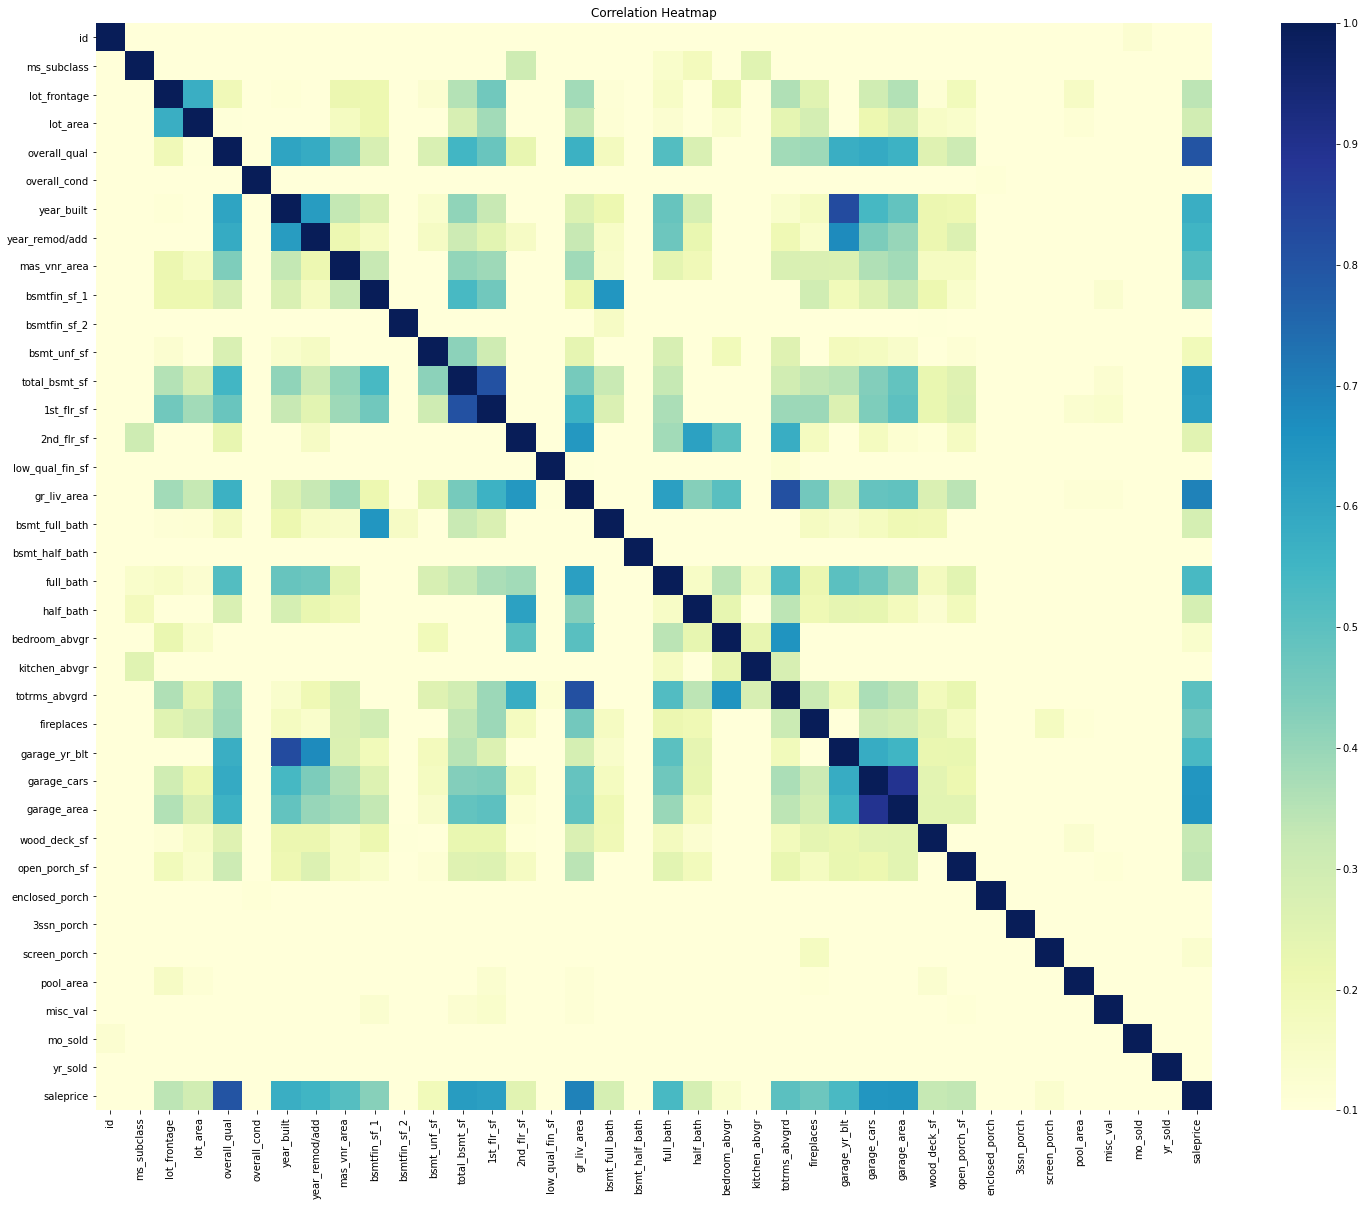

In [15]:
plt.figure(figsize=(25,20))
corr = train.corr()

sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            cmap='YlGnBu',
            vmin=1, vmax=0.1
           )
plt.title('Correlation Heatmap')
plt.savefig('datasets/heatmap.png')
plt.show()

The hheatmap shows that overall_qual and gr_liv_area have the highest correlation with the sales price. 

Other features with considerable correlations with sales price are garage_area, garage_cars, total_bsmt_sf, 1st_flr_sf. 

We can see high correlation between some independent variables. There is high correlation between gr_liv_area and totrms_abvgrd. Similar relation exists between garage_area and garage_cars. 

This will lead to multicollinearity and linear model might not be able to identify the relationship between these features and sales price. 

Hence, we will drop one of those features. 

To confirm the correlations, I will plot the scatter plot for these features.

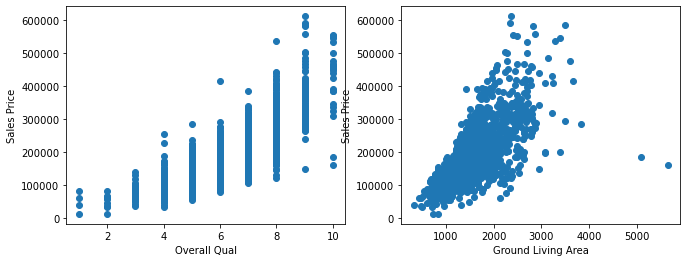

In [16]:
plt.figure(figsize = (11,4))
plt.subplot(1,2,1)
plt.scatter(train.overall_qual, train.saleprice)
plt.xlabel('Overall Qual'); plt.ylabel('Sales Price')
plt.subplot(1,2,2)
plt.scatter(train.gr_liv_area, train.saleprice)
plt.xlabel('Ground Living Area'); plt.ylabel('Sales Price')
plt.show()

<Figure size 1440x1080 with 0 Axes>

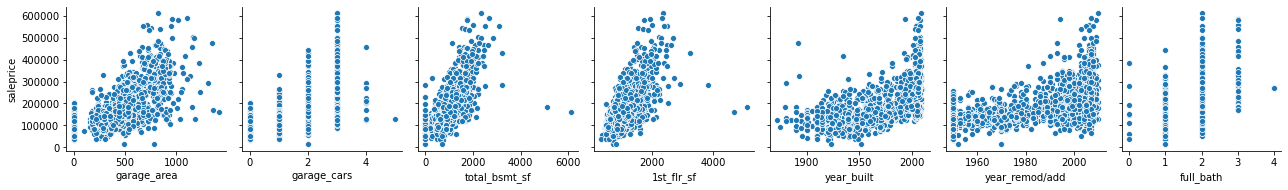

In [17]:
plt.figure(figsize=(20,15))
var = ['garage_area', 'garage_cars', 'total_bsmt_sf', '1st_flr_sf', 'year_built', 'year_remod/add', 'full_bath']
sns.pairplot(train, x_vars = var, y_vars = 'saleprice')
plt.show()

## Data Cleaning for Train Set


### Multicollinearity

I will drop totrms_abvgrd, and garage_cars columns as they have lower correlation with sales price compared to garage_area and gr_liv_area.


In [18]:
train.drop(['totrms_abvgrd', 'garage_cars'], axis =1, inplace = True)

In [19]:
train.shape # 2 columns dropped

(2051, 78)

### Outliers

Linear models are not robust to outliers, meaning one outlier could influence the true relationship between the house price and the predictor significantly. Therefore, we removed any observation that is far away from the mean sales price relative to any particular variable. 

We created boxplots to complement and confirm our decision to remove outliers from our model.

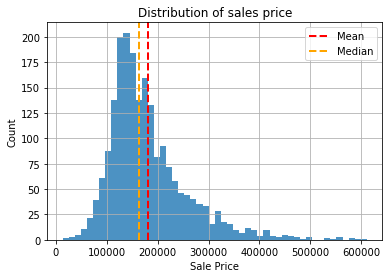

In [20]:
train['saleprice'].hist(bins=50, alpha=0.8)
plt.axvline(train['saleprice'].mean(), color='r', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(train['saleprice'].median(), color='orange', linestyle='dashed', linewidth=2, label='Median')
plt.xlabel('Sale Price')
plt.ylabel('Count')
plt.title("Distribution of sales price")
plt.legend()
plt.show()

In [21]:
def scatter_plot(dataframe, column_1, column_2, title):
    plt.figure(figsize=(10,6))
    sns.scatterplot(train[column_1], train[column_2])
    plt.title(title)

#### gr_liv_area vs saleprice outliers

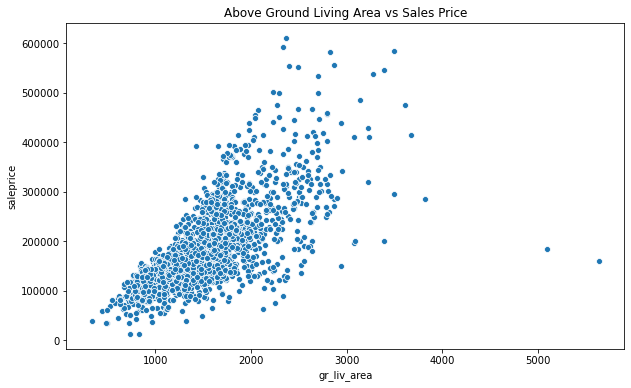

In [22]:
scatter_plot(train, 'gr_liv_area', 'saleprice', 'Above Ground Living Area vs Sales Price')

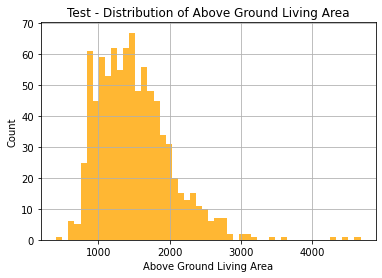

In [23]:
test['gr_liv_area'].hist(bins=50, alpha=0.8, color = 'orange')
plt.xlabel('Above Ground Living Area')
plt.ylabel('Count')
plt.title("Test - Distribution of Above Ground Living Area")
plt.show()

In order to make sure dropping outliers will not affect the modeling for test data set. I have plotted the distribution of sales price in test set to find out the maximum above ground living area.

Since the maximum is less than 5000, hence it is safe to drop the 2 outliers in train set, which have greater than 5000 above ground living area. 

In [24]:
train[train['gr_liv_area'] > 5000]

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
960,1499,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,0,480,Gd,NaN,NaN,0,1,2008,New,160000
1885,2181,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,0,NaN,NaN,Elev,17000,10,2007,New,183850


In [25]:
#drop gr_liv_area outliers
train.drop(index = 960, inplace=True)
train.drop(index = 1885, inplace=True)

#### lot_area vs saleprice outliers

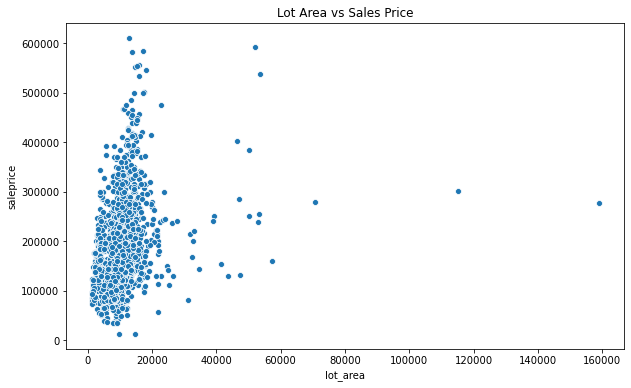

In [26]:
scatter_plot(train, 'lot_area', 'saleprice', 'Lot Area vs Sales Price')

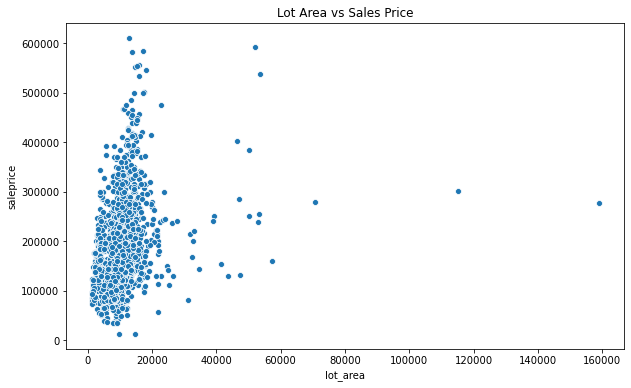

In [27]:
scatter_plot(test, 'lot_area', 'saleprice', 'Lot Area vs Sales Price')

Since in both train and test dataset, the distribution of lot area look almost exaclty the same, hence there is no need to remove outliers for lot area column.

In [28]:
train.shape

(2049, 78)

### Missing values

In [29]:
# check for nulls

train.isnull().sum()[train.isnull().sum()>0].sort_values(ascending=False)

pool_qc           2041
misc_feature      1985
alley             1909
fence             1649
fireplace_qu      1000
lot_frontage       330
garage_finish      114
garage_qual        114
garage_cond        114
garage_yr_blt      114
garage_type        113
bsmt_exposure       58
bsmtfin_type_2      56
bsmtfin_type_1      55
bsmt_cond           55
bsmt_qual           55
mas_vnr_area        22
mas_vnr_type        22
bsmt_full_bath       2
bsmt_half_bath       2
bsmt_unf_sf          1
bsmtfin_sf_2         1
bsmtfin_sf_1         1
garage_area          1
total_bsmt_sf        1
dtype: int64

In [30]:
nulls = train.isnull().sum()
nulls = nulls[nulls>0]
nulls_perc = nulls/train.shape[0]*100
nulls_perc.sort_values(ascending=False)

pool_qc           99.609566
misc_feature      96.876525
alley             93.167399
fence             80.478282
fireplace_qu      48.804295
lot_frontage      16.105417
garage_finish      5.563690
garage_qual        5.563690
garage_cond        5.563690
garage_yr_blt      5.563690
garage_type        5.514885
bsmt_exposure      2.830649
bsmtfin_type_2     2.733041
bsmtfin_type_1     2.684236
bsmt_cond          2.684236
bsmt_qual          2.684236
mas_vnr_area       1.073694
mas_vnr_type       1.073694
bsmt_full_bath     0.097609
bsmt_half_bath     0.097609
bsmt_unf_sf        0.048804
bsmtfin_sf_2       0.048804
bsmtfin_sf_1       0.048804
garage_area        0.048804
total_bsmt_sf      0.048804
dtype: float64

We will first handle the first 5 features with the most missing values.

1. pool_qc           
2. misc_feature      
3. alley             
4. fence             
5. fireplace_qu      

#### pool_qc column

In [31]:
train['pool_qc'].value_counts()

Gd    3
TA    2
Fa    2
Ex    1
Name: pool_qc, dtype: int64

In [32]:
train['pool_qc'].fillna('None', inplace=True) # fill with None
train['pool_qc'].isnull().sum() # check for nulls 

0

#### misc_feature column

In [33]:
train['misc_feature'].value_counts()

Shed    56
Gar2     4
Othr     3
TenC     1
Name: misc_feature, dtype: int64

In [34]:
train['misc_feature'].fillna('None', inplace=True) # fill with None
train['misc_feature'].isnull().sum() # check for nulls 

0

#### Categorical features

**alley** and **fence** are the other two features with many null values. Their values are categorial and I will convert them to numerical components to be used in model later.

#### alley column

Houses with an alley, no matter the material is Grvl of Pave, will be assigned 1; and the rest without alley will be assigned a 0.

In [35]:
train['alley'].value_counts()

Grvl    85
Pave    55
Name: alley, dtype: int64

In [ ]:
# Create column with value 1 if smoker and 0 if non-smoker.
train['alley'] = [1 if i == 'Yes' else 0 for i in df['smoker']]

In [36]:
alley_type = ['Grvl', 'Pave']

for type in alley_type:
    train.alley = train.alley.str.replace(type, '1')
    
train.alley.fillna(0, inplace=True) # fill with 0
train.alley= train.alley.apply(lambda x: int(x))

train['alley'].isnull().sum() # check for nulls 

0

#### fence column

Houses with fence, regardless of quality, will be assigned 1; and the rest without fence will be assigned 0.

In [37]:
train['fence'].value_counts()

MnPrv    227
GdPrv     83
GdWo      80
MnWw      10
Name: fence, dtype: int64

In [38]:
fence_quality = ['MnPrv', 'GdPrv', 'GdWo', 'MnWw']

for quality in fence_quality:
    train.fence = train.fence.str.replace(quality, '1')
    
train.fence.fillna(0, inplace=True)
train.fence = train.fence.apply(lambda x: int(x))

train['fence'].isnull().sum()

0

#### fireplace column

Houses with fireplace, regardless of quality, will be assigned 1; and the rest without fireplace will be assigned 0.

In [39]:
train['fireplace_qu'].value_counts()

Gd    521
TA    407
Fa     59
Po     31
Ex     31
Name: fireplace_qu, dtype: int64

In [40]:
fireplace_quality = ['Gd', 'TA', 'Fa', 'Po', 'Ex']

for quality in fireplace_quality:
    train.fireplace_qu = train.fireplace_qu.str.replace(quality, '1')
    
train.fireplace_qu.fillna(0, inplace=True)
train.fireplace_qu = train.fireplace_qu.apply(lambda x: int(x))

train['fireplace_qu'].isnull().sum()

0

#### garage-related columns

In [41]:
# combine 6 garage-related columns into one single variable

garage_columns = ['garage_type', 'garage_yr_blt', 'garage_finish','garage_area', 
                  'garage_qual', 'garage_cond']

In [42]:
train[train['garage_area'].isnull()][garage_columns]

,garage_type,garage_yr_blt,garage_finish,garage_area,garage_qual,garage_cond
1712,Detchd,NaN,NaN,NaN,NaN,NaN


Since index 1712 only filled the garage type and the rest of the information is unavailable, I will drop it.

In [43]:
# drop index 1712

train.drop(index = 1712, inplace=True)

In [44]:
train.head()

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,60,RL,NaN,13517,Pave,0,IR1,Lvl,AllPub,...,0,0,None,0,None,0,3,2010,WD,130500
1,544,60,RL,43.0,11492,Pave,0,IR1,Lvl,AllPub,...,0,0,None,0,None,0,4,2009,WD,220000
2,153,20,RL,68.0,7922,Pave,0,Reg,Lvl,AllPub,...,0,0,None,0,None,0,1,2010,WD,109000
3,318,60,RL,73.0,9802,Pave,0,Reg,Lvl,AllPub,...,0,0,None,0,None,0,4,2010,WD,174000
4,255,50,RL,82.0,14235,Pave,0,IR1,Lvl,AllPub,...,0,0,None,0,None,0,3,2010,WD,138500


#### Categorical garage-related features

**garage_type**, **garage_finish**, **garage_qual**, **garage_cond** are the four features with null values. Their values are categorial and I will convert them to numerical components to be used in model later.

Houses without garage will be assiged None.


In [45]:
categorical_garage = ['garage_type', 'garage_finish', 'garage_qual', 'garage_cond']

[train[column].fillna(str('None'), inplace = True) for column in categorical_garage]

[None, None, None, None]

#### garage_yr_blt column

Since usually garage is built when the house is constructed, there is no need to keep this feature. Hence, I will drop it.

In [46]:
train.drop(['garage_yr_blt'], axis=1, inplace = True)

#### basement-related columns

In [47]:
# combine basement-related columns into one single variable

basement_columns = ['bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf', 'bsmt_full_bath', 'bsmt_half_bath']

In [48]:
train[train['total_bsmt_sf'].isnull()][basement_columns]

,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,bsmt_full_bath,bsmt_half_bath
1327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
# drop index 1327

train.drop(index = 1327, inplace=True)

#### Numerical basement-related features

1. bsmt_full_bath       
2. bsmt_half_bath       
3. bsmt_unf_sf          
4. bsmtfin_sf_2         
5. bsmtfin_sf_1
6. total_bsmt_sf 

Their values are numerical and I will fill in missing values with 0. 


#### Categorical basement-related features

1. bsmt_exposure     
2. bsmtfin_type_2    
3. bsmtfin_type_1    
4. bsmt_cond         
5. bsmt_qual         

Their values are catergorial and I will convert them to numerical components to be used in model later. Houses without basement will be assiged None.

In [50]:
numerical_basement = ['bsmt_full_bath', 'bsmt_half_bath', 'bsmt_unf_sf', 'bsmtfin_sf_2', 'bsmtfin_sf_1', 'total_bsmt_sf']

[train[column].fillna(0, inplace=True) for column in numerical_basement]

[None, None, None, None, None, None]

In [51]:
categorical_basement = ['bsmt_exposure', 'bsmtfin_type_2', 'bsmtfin_type_1', 'bsmt_cond', 'bsmt_qual'] 

[train[column].fillna(str('None'), inplace = True) for column in categorical_basement]

[None, None, None, None, None]

#### lot_frontage column

In [52]:
train['lot_frontage'].value_counts()

60.0     179
70.0      96
80.0      94
50.0      89
65.0      71
        ... 
135.0      1
22.0       1
313.0      1
116.0      1
137.0      1
Name: lot_frontage, Length: 118, dtype: int64

In [53]:
# group by neighbour and calculate the mean of lot_frontage

frontage_mean = train.groupby('neighborhood').lot_frontage.mean()
frontage_mean

neighborhood
Blmngtn    47.250000
Blueste    27.666667
BrDale     21.315789
BrkSide    55.739130
ClearCr    92.500000
CollgCr    70.753247
Crawfor    69.272727
Edwards    64.511811
Gilbert    72.025641
Greens     40.000000
GrnHill          NaN
IDOTRR     62.079365
Landmrk          NaN
MeadowV    26.809524
Mitchel    75.476923
NAmes      75.192453
NPkVill    27.625000
NWAmes     80.965517
NoRidge    88.305556
NridgHt    86.294118
OldTown    62.802548
SWISU      58.387097
Sawyer     72.774648
SawyerW    70.493333
Somerst    63.982906
StoneBr    60.058824
Timber     78.594595
Veenker    67.846154
Name: lot_frontage, dtype: float64

Even though we have found out the mean of lot_frontage in each neighbourhood, outside research is needed to confirm if the linear feet in each neighbourhood is similar. Hence, we can't simply fill NA with the mean without extra confirmation. Due to time limit, in this case, I will drop the NA in lot_frontage column.

In [54]:
train.dropna(subset = ['lot_frontage'], inplace=True)

In [55]:
train['lot_frontage'].isnull().sum()

0

#### masonry veneer-related columns

mas_vnr_type is categorical value and I will fill in missing values with None.

mas_vnr_area is numerical value and I will willing in missing values with 0.

In [56]:
mas_columns = ['mas_vnr_type', 'mas_vnr_area']

# fill in 'None' for NaN for mas_vnr_type column
train['mas_vnr_type'].fillna(str('None'), inplace = True)

# fill in 0 for NaN for mas_vnr_area column 
train['mas_vnr_area'].fillna(0, inplace = True)

In [57]:
# check for nulls

train.isnull().sum()[train.isnull().sum()>0].sort_values(ascending=False)

Series([], dtype: int64)

In [58]:
train.shape

(1717, 77)

## Data Cleaning for Test Set

### Multicollinearity

In [59]:
test.drop(['totrms_abvgrd', 'garage_cars'], axis =1, inplace = True)

In [60]:
test.shape # 2 columns dropped

(879, 77)

### Missing values

In [61]:
# check for nulls

test.isnull().sum()[test.isnull().sum()>0].sort_values(ascending=False)

pool_qc           875
misc_feature      838
alley             821
fence             707
fireplace_qu      422
lot_frontage      160
garage_yr_blt      45
garage_finish      45
garage_qual        45
garage_cond        45
garage_type        44
bsmtfin_type_2     25
bsmtfin_type_1     25
bsmt_exposure      25
bsmt_cond          25
bsmt_qual          25
mas_vnr_area        1
mas_vnr_type        1
electrical          1
dtype: int64

In [62]:
nulls = test.isnull().sum()
nulls = nulls[nulls>0]
nulls_perc = nulls/test.shape[0]*100
nulls_perc.sort_values(ascending=False)

pool_qc           99.544937
misc_feature      95.335609
alley             93.401593
fence             80.432309
fireplace_qu      48.009101
lot_frontage      18.202503
garage_yr_blt      5.119454
garage_finish      5.119454
garage_qual        5.119454
garage_cond        5.119454
garage_type        5.005688
bsmtfin_type_2     2.844141
bsmtfin_type_1     2.844141
bsmt_exposure      2.844141
bsmt_cond          2.844141
bsmt_qual          2.844141
mas_vnr_area       0.113766
mas_vnr_type       0.113766
electrical         0.113766
dtype: float64

Missing values in Test set are similar to those in Train set. Hence, we will apply the same methds to clean test dataset.

There is one difference, which is the electrical column, and it will be handled in this part. 

Similar to train set, will first handle the first 5 features with the most missing values.

1. pool_qc           
2. misc_feature      
3. alley             
4. fence             
5. fireplace_qu 




#### pool_qc column

In [63]:
test['pool_qc'].fillna('None', inplace=True) # fill with None
test['pool_qc'].isnull().sum() # check for nulls 

0

#### misc_feature column

In [64]:
test['misc_feature'].fillna('None', inplace=True) # fill with None
test['misc_feature'].isnull().sum() # check for nulls 

0

#### alley column

In [65]:
for type in alley_type:
    test.alley = test.alley.str.replace(type, '1')
    
test.alley.fillna(0, inplace=True) # fill with 0
test.alley= test.alley.apply(lambda x: int(x))

test['alley'].isnull().sum() # check for nulls 

0

#### fence column

In [66]:
for quality in fence_quality:
    test.fence = test.fence.str.replace(quality, '1')
    
test.fence.fillna(0, inplace=True)
test.fence = test.fence.apply(lambda x: int(x))

test['fence'].isnull().sum()

0

#### fireplace column

In [67]:
for quality in fireplace_quality:
    test.fireplace_qu = test.fireplace_qu.str.replace(quality, '1')
    
test.fireplace_qu.fillna(0, inplace=True)
test.fireplace_qu = test.fireplace_qu.apply(lambda x: int(x))

test['fireplace_qu'].isnull().sum()

0

#### garage-related columns

In [68]:
[test[column].fillna(str('None'), inplace = True) for column in categorical_garage]

[None, None, None, None]

#### garage_yr_blt column

In [69]:
test.drop(['garage_yr_blt'], axis=1, inplace = True)

#### basement-related columns

In [70]:
[test[column].fillna(0, inplace=True) for column in numerical_basement]

[None, None, None, None, None, None]

In [71]:
[test[column].fillna(str('None'), inplace = True) for column in categorical_basement]

[None, None, None, None, None]

#### lot_frontage column

In [72]:
test.dropna(subset = ['lot_frontage'], inplace=True)

#### electrical column

In [73]:
test[test['electrical'].isnull()][['electrical']]

,electrical
635,NaN


In [74]:
# fill missing value with mode
test['electrical'].fillna(test['electrical'].mode()[0], inplace = True)

In [75]:
test['electrical'].isnull().sum()

0

#### masonry veneer-related columns

In [76]:
# fill in 'None' for NaN for mas_vnr_type column
test['mas_vnr_type'].fillna(str('None'), inplace = True)

# fill in 0 for NaN for mas_vnr_area column 
test['mas_vnr_area'].fillna(0, inplace = True)

#### Data cleaning for both train set and test set are done.

In [77]:
# check for nulls

test.isnull().sum().sum()

0

In [78]:
# check for nulls

train.isnull().sum().sum()

0

In [79]:
test.shape

(719, 76)

In [80]:
train.shape

(1717, 77)

## Exploratory Data Analysis

### EDA: histogram

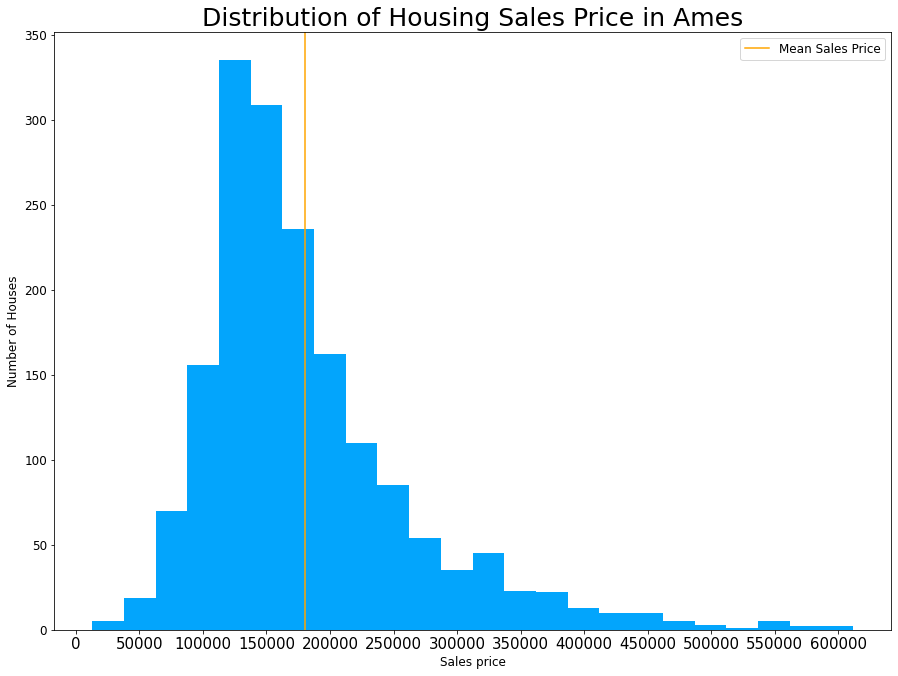

In [81]:
plt.figure(figsize=(15, 11))
plt.hist(train.saleprice, bins=24, color='#03a5fc')
plt.title("Distribution of Housing Sales Price in Ames", fontsize=25)
plt.xticks(ticks=range(0, 650000, 50000), fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel('Sales price', fontsize=12)
plt.ylabel('Number of Houses', fontsize=12)
plt.axvline(train.saleprice.mean(), color='orange', label='Mean Sales Price')
plt.legend(fontsize=12);

In [82]:
train.saleprice.mean()

180284.29004076877

The above historgram shows the distribution of housing sales price in Ames, which range between 50,000 and 600,000. The mean sales price is 180284. 

### EDA: histogram

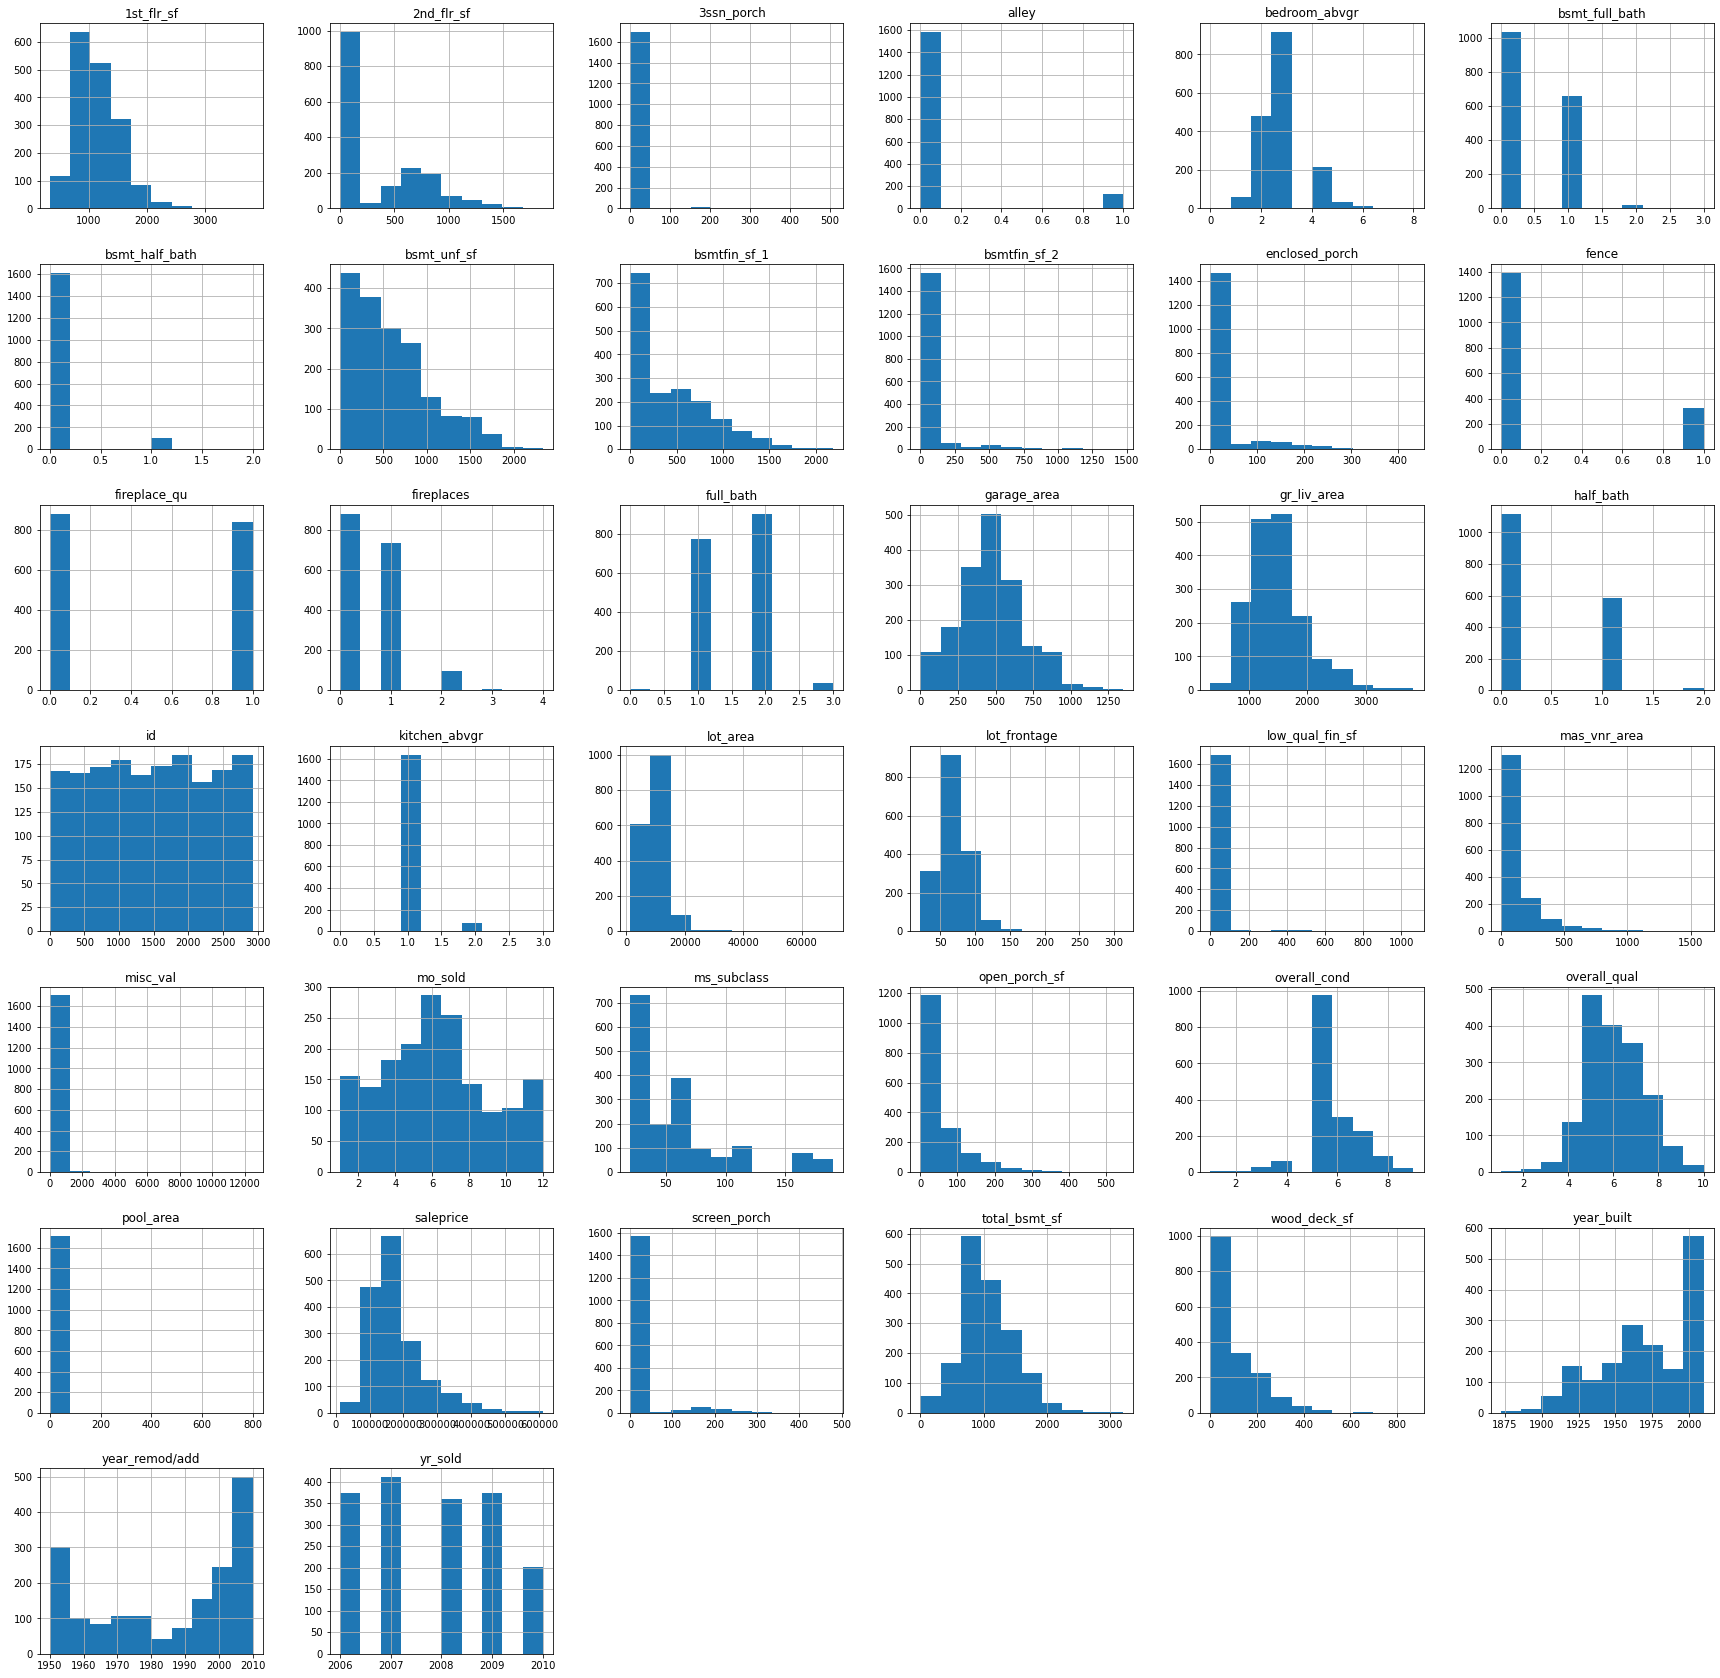

In [83]:
train.hist(figsize=(30, 30));

### EDA: heatmap

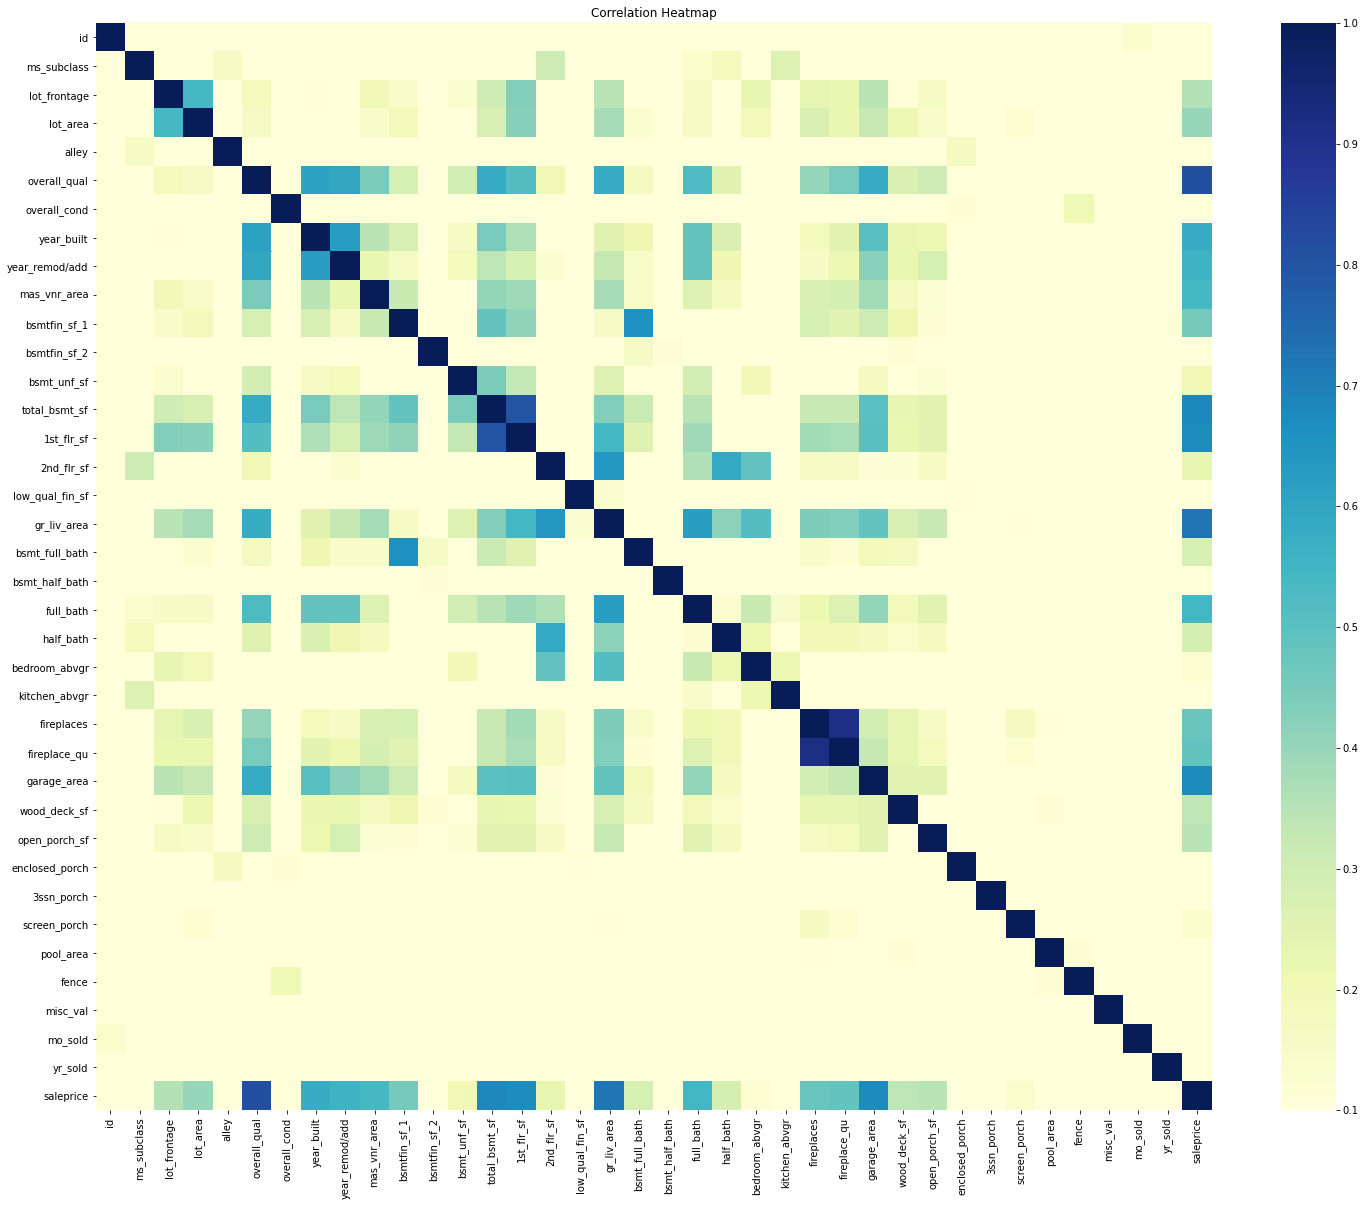

In [84]:
plt.figure(figsize=(25,20))
corr = train.corr()

sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            cmap='YlGnBu',
            vmin=1, vmax=0.1
           )
plt.title('Correlation Heatmap')
plt.savefig('datasets/heatmap2.png')
plt.show()

In [85]:
# find out those features that are highly correlated to sales price

corr = train.corr()
corr['saleprice'].sort_values(ascending=False).head(15)

saleprice         1.000000
overall_qual      0.815698
gr_liv_area       0.723847
total_bsmt_sf     0.683293
garage_area       0.675651
1st_flr_sf        0.669985
year_built        0.581025
year_remod/add    0.558339
full_bath         0.544465
mas_vnr_area      0.540944
fireplace_qu      0.487290
fireplaces        0.476892
bsmtfin_sf_1      0.452499
lot_area          0.400482
lot_frontage      0.356742
Name: saleprice, dtype: float64

The heatmap has shown the correlation between features and sales price.

The top 5 features that have the strongest influence over sales price are:

1. overall_qual      
2. gr_liv_area       
3. total_bsmt_sf     
4. garage_area       
5. 1st_flr_sf        

## Preprocessing and Modeling

### One-hot Encoding

Before modeling, I will dummy out the non-numerical features in both test and train datasets.

Since One-hot Encoding is only applicable to nominal categorical values, I will separate categorical ordinal and nominal before One-hot Encoding. 

In [86]:
#replace ordinal variables with ranked values for train set

train['bsmt_qual'].replace(to_replace = ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4, 5], inplace = True)
train['bsmt_cond'].replace(to_replace = ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4, 5], inplace = True)
train['bsmt_exposure'].replace(to_replace = ['None', 'No', 'Mn', 'Av', 'Gd'], value = [0, 1, 2, 3, 4], inplace = True)
train['bsmtfin_type_1'].replace(to_replace = ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], value = [0, 1, 2, 3, 4, 5, 6], inplace = True)
train['bsmtfin_type_2'].replace(to_replace = ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], value = [0, 1, 2, 3, 4, 5, 6], inplace = True)

train['garage_finish'].replace(to_replace =  ['None', 'Unf', 'RFn', 'Fin'], value = [0, 1, 2, 3], inplace = True)
train['garage_qual'].replace(to_replace =  ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4, 5], inplace = True)
train['garage_cond'].replace(to_replace =  ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4, 5], inplace = True)

train['pool_qc'].replace(to_replace = ['None', 'Gd', 'TA', 'Fa', 'Ex'], value = [0, 1, 2, 3, 4], inplace = True)
train['lot_shape'].replace(to_replace = ['IR3', 'IR2', 'IR1', 'Reg'], value = [0, 1, 2, 3], inplace = True)
train['utilities'].replace(to_replace = ['ELO','NoSeWa','NoSewr', 'AllPub'], value = [0, 1, 2, 3], inplace = True)
train['land_slope'].replace(to_replace = ['Sev', 'Mod', 'Gtl'], value = [0, 1, 2], inplace = True)
train['exter_qual'].replace(to_replace = ['Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3], inplace = True)
train['exter_cond'].replace(to_replace = ['Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4], inplace = True)
train['heating_qc'].replace(to_replace = ['Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4], inplace = True)
train['electrical'].replace(to_replace = ['FuseP', 'FuseF', 'Mix', 'FuseA', 'SBrkr'], value = [0, 1, 2, 3, 4], inplace = True)
train['kitchen_qual'].replace(to_replace = ['Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4], inplace = True)
train['functional'].replace(to_replace = ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'], value = [0, 1, 2, 3, 4, 5, 6, 7], inplace = True)
train['paved_drive'].replace(to_replace =  ['N', 'P', 'Y'], value = [0, 1, 2], inplace = True)

In [87]:
#replace ordinal variables with ranked values for test set

test['bsmt_qual'].replace(to_replace = ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4, 5], inplace = True)
test['bsmt_cond'].replace(to_replace = ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4, 5], inplace = True)
test['bsmt_exposure'].replace(to_replace = ['None', 'No', 'Mn', 'Av', 'Gd'], value = [0, 1, 2, 3, 4], inplace = True)
test['bsmtfin_type_1'].replace(to_replace = ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], value = [0, 1, 2, 3, 4, 5, 6], inplace = True)
test['bsmtfin_type_2'].replace(to_replace = ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], value = [0, 1, 2, 3, 4, 5, 6], inplace = True)

test['garage_finish'].replace(to_replace =  ['None', 'Unf', 'RFn', 'Fin'], value = [0, 1, 2, 3], inplace = True)
test['garage_qual'].replace(to_replace =  ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4, 5], inplace = True)
test['garage_cond'].replace(to_replace =  ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4, 5], inplace = True)

test['pool_qc'].replace(to_replace = ['None', 'Gd', 'TA', 'Fa', 'Ex'], value = [0, 1, 2, 3, 4], inplace = True)
test['lot_shape'].replace(to_replace = ['IR3', 'IR2', 'IR1', 'Reg'], value = [0, 1, 2, 3], inplace = True)
test['utilities'].replace(to_replace = ['ELO','NoSeWa','NoSewr', 'AllPub'], value = [0, 1, 2, 3], inplace = True)
test['land_slope'].replace(to_replace = ['Sev', 'Mod', 'Gtl'], value = [0, 1, 2], inplace = True)
test['exter_qual'].replace(to_replace = ['Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3], inplace = True)
test['exter_cond'].replace(to_replace = ['Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4], inplace = True)
test['heating_qc'].replace(to_replace = ['Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4], inplace = True)
test['electrical'].replace(to_replace = ['FuseP', 'FuseF', 'Mix', 'FuseA', 'SBrkr'], value = [0, 1, 2, 3, 4], inplace = True)
test['kitchen_qual'].replace(to_replace = ['Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4], inplace = True)
test['functional'].replace(to_replace = ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'], value = [0, 1, 2, 3, 4, 5, 6, 7], inplace = True)
test['paved_drive'].replace(to_replace =  ['N', 'P', 'Y'], value = [0, 1, 2], inplace = True)

In [88]:
# combine all nominal variables

nominal_variables=['ms_subclass', 'ms_zoning', 'street', 'alley', 'land_contour', 'lot_config', 'neighborhood', 
                   'condition_1', 'condition_2', 'bldg_type', 'house_style', 'roof_style', 
                   'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type', 'foundation', 'heating', 
                   'central_air', 'garage_type', 'misc_feature', 'sale_type', 'mo_sold', 'yr_sold']

In [89]:
# create dummies for all nominal variables in train set

train_dummies = pd.get_dummies(train, columns = nominal_variables)

In [90]:
# create dummies for all nominal variables in test set

test_dummies = pd.get_dummies(test, columns = nominal_variables)

In [91]:
train_dummies.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1717 entries, 1 to 2050
Data columns (total 238 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1717 non-null   int64  
 1   lot_frontage          1717 non-null   float64
 2   lot_area              1717 non-null   int64  
 3   lot_shape             1717 non-null   int64  
 4   utilities             1717 non-null   int64  
 5   land_slope            1717 non-null   int64  
 6   overall_qual          1717 non-null   int64  
 7   overall_cond          1717 non-null   int64  
 8   year_built            1717 non-null   int64  
 9   year_remod/add        1717 non-null   int64  
 10  mas_vnr_area          1717 non-null   float64
 11  exter_qual            1717 non-null   int64  
 12  exter_cond            1717 non-null   int64  
 13  bsmt_qual             1717 non-null   int64  
 14  bsmt_cond             1717 non-null   int64  
 15  bsmt_exposure       

In [92]:
test_dummies.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 719 entries, 0 to 878
Data columns (total 230 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    719 non-null    int64  
 1   lot_frontage          719 non-null    float64
 2   lot_area              719 non-null    int64  
 3   lot_shape             719 non-null    int64  
 4   utilities             719 non-null    int64  
 5   land_slope            719 non-null    int64  
 6   overall_qual          719 non-null    int64  
 7   overall_cond          719 non-null    int64  
 8   year_built            719 non-null    int64  
 9   year_remod/add        719 non-null    int64  
 10  mas_vnr_area          719 non-null    float64
 11  exter_qual            719 non-null    int64  
 12  exter_cond            719 non-null    int64  
 13  bsmt_qual             719 non-null    int64  
 14  bsmt_cond             719 non-null    int64  
 15  bsmt_exposure         

In [93]:
train_dummies.shape

(1717, 238)

In [94]:
test_dummies.shape

(719, 230)

In order to keep the same dataframe strucuture between train and test datasets, I will add 0 to the missing columns in test_clean_dummies dataset.

In [95]:
missing_cols = set(train_dummies.columns) - set(test_dummies.columns)

for col in missing_cols:
    test_dummies[col] = 0

In [96]:
test_dummies = test_dummies[train_dummies.columns]

In [97]:
test_dummies.drop(columns = ['saleprice'], inplace = True)

In [98]:
test_dummies.shape

(719, 237)

### Modeling

### Model Prep: Create our features matrix (`X`) and target vector (`y`)

In [99]:
features = [col for col in train_dummies.columns if col != 'saleprice']

X = train_dummies[features]
y = train_dummies.saleprice

### Model Prep: Train/test split

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Model Prep: Scaling

In [101]:
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

### Model Prep: Instantiate our models

I'll be evaluating `LinearRegression`, `LassoCV` and `RidgeCV`, so we'll need to create instances of all three learning algorithms.

In [102]:
lr = LinearRegression()

In [103]:
lasso = LassoCV(n_alphas=200)

In [104]:
ridge = RidgeCV(alphas=np.linspace(.1, 10, 100))

### Cross validation

Use `cross_val_score` to evaluate all three learning algorithms.

In [105]:
lr_scores = cross_val_score(lr, X_train, y_train, cv=5)
lr_scores.mean()

-5.150003376485943e+20

In [106]:
lasso_scores = cross_val_score(lasso, X_train, y_train, cv=5)
lasso_scores.mean()

0.9130454920084263

In [107]:
ridge_scores = cross_val_score(ridge, X_train, y_train, cv=5)
ridge_scores.mean()

0.9018047309101125

### LassoCV Model Fitting and Evaluation

In [108]:
lasso.fit(X_train, y_train)

LassoCV(n_alphas=200)

In [109]:
lasso.score(X_train, y_train)

0.9348675328297206

In [110]:
lasso.score(X_test, y_test)

0.9184654343621441

In [111]:
lasso_scores.mean()

0.9130454920084263

In [112]:
lasso_pred = lasso.predict(X_test)

(mean_squared_error(y_test, lasso_pred)) ** .5

22878.64708710483

In [113]:
r2_score(y_test, lasso_pred)

0.9184654343621441

In [114]:
# RMSE for both train and test

display(np.sqrt(mean_squared_error(y_train, lasso.predict(X_train))),
        np.sqrt(mean_squared_error(y_test, lasso.predict(X_test))))

21314.261770546214

22878.64708710483

In [115]:
# difference in RMSE

np.sqrt(mean_squared_error(y_train, lasso.predict(X_train))) - np.sqrt(mean_squared_error(y_test, lasso.predict(X_test)))



-1564.3853165586152


### RidgeCV Model Fitting and Evaluation

In [116]:
ridge.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. ]))

In [117]:
ridge.score(X_train, y_train)

0.9436460982531211

In [118]:
ridge.score(X_test, y_test)

0.9079072833177921

In [119]:
ridge_pred = ridge.predict(X_test)

(mean_squared_error(y_test, ridge_pred)) ** .5

24314.878318342817

In [120]:
r2_score(y_test, ridge_pred)

0.9079072833177921

In [121]:
# RMSE for both train and test

display(np.sqrt(mean_squared_error(y_train, ridge.predict(X_train))),
        np.sqrt(mean_squared_error(y_test, ridge.predict(X_test))))

19825.928054661403

24314.878318342817

In [122]:
# difference in RMSE

np.sqrt(mean_squared_error(y_train, ridge.predict(X_train))) - np.sqrt(mean_squared_error(y_test, ridge.predict(X_test)))




-4488.950263681414

#### Compare model



Lasso: 
R2: 0.914
difference in RMSE: 1564

Ridge:
R2: 0.892
difference in RMSE: 4488

Since Lasso model has better R2 score, and its difference in RMSE between train and datasets are smaller, Lasso model is the better model.


To visualise our regression model, I will plot predictions against the actual housing sales price.

Text(0.5, 1.0, 'Predicted Prices v.s. Residuals')

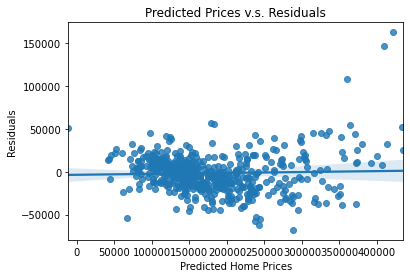

In [123]:
lasso_pred = lasso.predict(X_test)
residuals = y_test - lasso_pred

sns.regplot(lasso_pred, residuals)
plt.xlabel('Predicted Home Prices')
plt.ylabel('Residuals')
plt.title('Predicted Prices v.s. Residuals')

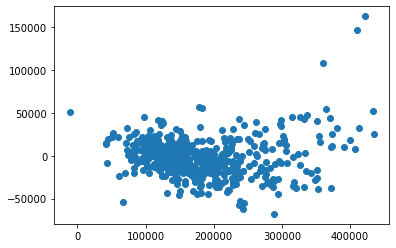

In [124]:
plt.scatter(lasso_pred, residuals)

In [125]:
lasso.alpha_

567.8240877265099

In [126]:
lasso.coef_

array([-0.00000000e+00,  0.00000000e+00,  6.21577105e+03,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  1.31607751e+04,  4.54890696e+03,
        7.32220615e+03,  1.42513682e+03,  6.35106180e+03,  8.45076931e+03,
       -0.00000000e+00,  0.00000000e+00, -6.90496788e+02,  3.62876759e+03,
        0.00000000e+00,  9.91405233e+03,  0.00000000e+00,  3.41387762e+02,
       -0.00000000e+00,  7.39164931e+03,  6.25713282e+01, -0.00000000e+00,
        8.88007662e+02,  0.00000000e+00, -0.00000000e+00,  2.39392061e+04,
        1.35262578e+03, -0.00000000e+00,  6.99456257e+02,  1.37561839e+03,
       -2.09274854e+03, -1.24643756e+02,  4.08330005e+03,  2.92807482e+03,
        1.24219527e+03, -0.00000000e+00,  0.00000000e+00,  6.97360252e+03,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  2.19950571e+02,
        6.44352471e+02, -0.00000000e+00,  0.00000000e+00,  3.02462926e+03,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

Using the coefficient, we will be able to determine which features have the strongest influence over sales price.

In [127]:
lasso.fit(X_train, y_train)

lasso_coefs = pd.DataFrame({'variable':X.columns,
                            'coef':lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_)})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

lasso_coefs.head(10)

,variable,coef,abs_coef
27,gr_liv_area,23939.206088,23939.206088
6,overall_qual,13160.775101,13160.775101
17,bsmtfin_sf_1,9914.052326,9914.052326
11,exter_qual,8450.769313,8450.769313
104,neighborhood_NridgHt,7536.830001,7536.830001
21,total_bsmt_sf,7391.649313,7391.649313
8,year_built,7322.206152,7322.206152
39,garage_area,6973.602517,6973.602517
110,neighborhood_StoneBr,6529.832697,6529.832697
10,mas_vnr_area,6351.061799,6351.061799


In [128]:
def plot_coef(model, top_n = 10):
    
    cols = X.columns
    coef = model.coef_
    zipped = list(zip(cols, coef))
    zipped.sort(key=lambda x: x[1], reverse = True)
    top_10 = pd.DataFrame(zipped).head(top_n)
    return pd.concat([top_10], axis=0).plot.barh(x = 0, y = 1)

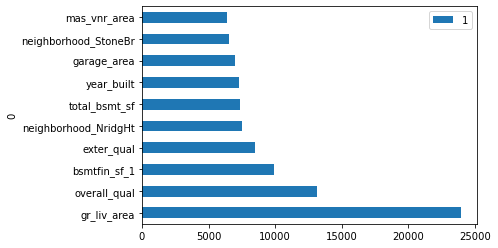

In [129]:
plot_coef(lasso)

After modeling, we have learnt that the top 5 features that have the strongest influence over sales price are:

1. Above Ground Living Area
2. Overall Quality 	
3. Basement Finish Surface Area
4. External Quality
5. Total Basement Surface Area

The two good neighbourhoods are: 

1. Northridge Heights
2. Stone Brook 

In [130]:
def plot_coef(model, top_n = 10):
    
    cols = X.columns
    coef = model.coef_
    zipped = list(zip(cols, coef))
    zipped.sort(key=lambda x: x[1], reverse = True)
    bottom_10 = pd.DataFrame(zipped).tail(top_n)
    return pd.concat([bottom_10], axis=0).plot.barh(x = 0, y = 1)

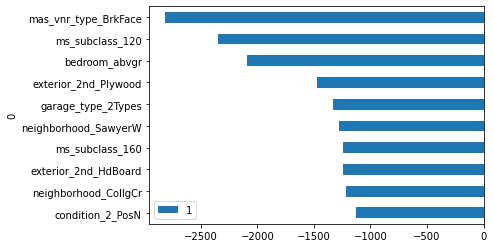

In [131]:
plot_coef(lasso)

The 5 features that hurt the value of a home the most are: 

1. Masonry veneer type BrkFace
2. Ms_subclass 2 storey
2. Bedroom above ground
3. Ms subclass 1 storey
4. Neighborhoood CollgCr
5. Exterior 2nd Plywood

## Predict Test Dataset

In [132]:
test_dummies_sc = ss.transform(test_dummies)

In [133]:
pred = lasso.predict(test_dummies_sc)

In [134]:
submission = pd.DataFrame(pred, index=test_dummies.index, columns=['saleprice'])

In [135]:
submission.head(10)

,saleprice
0,143683.176203
2,231772.266148
3,125283.166492
5,83301.075657
6,106310.723651
8,181754.303896
9,162418.444815
10,138785.803051
11,123881.600757
12,149221.974905


In [136]:
submission.sort_index(inplace=True)
submission.head()

,saleprice
0,143683.176203
2,231772.266148
3,125283.166492
5,83301.075657
6,106310.723651


In [137]:
# save the submission data 

submission.to_csv('datasets/submission.csv')

## Conclusion and Recommendations

After modeling, we have learnt that the top 5 features that have the strongest influence over sales price are:

1. Above Ground Living Area
2. Overall Quality 	
3. Basement Finish Surface Area
4. External Quality
5. Total Basement Surface Area

The two good neighbourhoods are: 

1. Northridge Heights
2. Stone Brook 

The 5 features that hurt the value of a home the most are: 

1. Masonry veneer type BrkFace
2. Ms_subclass 2 storey
2. Bedroom above ground
3. Ms subclass 1 storey
4. Neighborhoood CollgCr
5. Exterior 2nd Plywood


I don't think lasso model can generalize to other cities, as the main problem with lasso regression model itself is that when we have correlated variables, it retains only one variable and sets other correlated variables to zero. That will possibly lead to some loss of information resulting in lower accuracy in our model.

If we want to retain all of the features, we can consider to apply ridge regression, as it has similar score as lasso. However, ridge will shrink the coefficients and the model will remain complex and might lead to poor model performance. Hence, we can consider elastic net regression, which is basically a hybrid of ridge and lasso regression.

In this case, I chose lasso model coz it has the best score among the three regression models. If we want to develop a model that can be generalized to other cities, elastic net regression would be a better option as it will not omit some variables like lasso. 